In [ ]:
!pip install gdown

In [ ]:
!apt-get install git
!pip install Pillow
!pip install matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
REPO="https://github.com/CamiloVelezP/DetecionDeMascarillas"
BRANCH="main"
FOLDER="dataset"
!git init temp_repo
%cd temp_repo
!git remote add origin $REPO
!git config core.sparseCheckout true
!echo $FOLDER/ > .git/info/sparse-checkout
!git pull origin $BRANCH
%cd ..
!mv temp_repo/$FOLDER .
!rm -rf temp_repo

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/temp_repo/.git/
/content/temp_repo
remote: Enumerating objects: 8845, done.
remote: Total 8845 (delta 0), reused 0 (delta 0), pack-reused 8845
Receiving objects: 100% (8845/8845), 216.38 MiB | 18.52 MiB/s, done.
Resolving deltas: 100% (4/4), done.
From https://github.com/CamiloVelezP/DetecionDeMascarillas
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main
Updating files: 100% (8982/8982), done.
/content


In [ ]:
file_id = '1yZ72WmBQl5FBS55hv2apaA0nbJGU151E'
destination = 'modelo.zip'

import gdown

# Descargar el archivo usando gdown
gdown.download(id=file_id, output=destination)

# Descomprimir el archivo
!unzip {destination} -d /content/


Downloading...
From (original): https://drive.google.com/uc?id=1yZ72WmBQl5FBS55hv2apaA0nbJGU151E
From (redirected): https://drive.google.com/uc?id=1yZ72WmBQl5FBS55hv2apaA0nbJGU151E&confirm=t&uuid=ffbacd38-39e3-4c57-96b8-2e504159ac21
To: /content/modelo.zip
100%|██████████| 73.7M/73.7M [00:00<00:00, 78.7MB/s]


Archive:  modelo.zip
   creating: /content/mi_modelo_final/
   creating: /content/mi_modelo_final/assets/
  inflating: /content/mi_modelo_final/correct (1).png  
  inflating: /content/mi_modelo_final/correct (2).png  
  inflating: /content/mi_modelo_final/correct (3).png  
 extracting: /content/mi_modelo_final/fingerprint.pb  
  inflating: /content/mi_modelo_final/incorrect (1).png  
  inflating: /content/mi_modelo_final/incorrect (2).png  
  inflating: /content/mi_modelo_final/incorrect (3).png  
  inflating: /content/mi_modelo_final/keras_metadata.pb  
  inflating: /content/mi_modelo_final/others (1).jpg  
  inflating: /content/mi_modelo_final/others (2).jpg  
  inflating: /content/mi_modelo_final/others (3).jpg  
  inflating: /content/mi_modelo_final/others (4).jpg  
  inflating: /content/mi_modelo_final/others (5).jpg  
  inflating: /content/mi_modelo_final/others (6).jpg  
  inflating: /content/mi_modelo_final/saved_model.pb  
   creating: /content/mi_modelo_final/variables/
  inf

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.models import load_model


##Importación del modelo entrenado

In [ ]:
model = load_model('/content/mi_modelo_final')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

El modelo CNN es una red secuencial compuesta por capas convolucionales, de pooling y densas.

    Capas Convolucionales: Dos capas (Conv2D) con 32 y 64 filtros respectivamente, que extraen características de las imágenes.
    Capas de Pooling: Dos capas (MaxPooling2D) que reducen la dimensionalidad de las características extraídas.
    Aplanamiento: Una capa (Flatten) que convierte las características 2D en un vector 1D.
    Capas Densas: Tres capas densas (Dense) con 128, 64 y 3 unidades, que realizan la clasificación. Se incluyen dos capas de dropout para prevenir el sobreajuste.

## Prueba del Modelo con Imágenes Individuales

Este código define una función para probar el modelo con imágenes individuales. La función procesa la imagen, realiza una predicción y muestra el resultado junto con la imagen original. También se proporcionan ejemplos de cómo utilizar esta función con diferentes imágenes de prueba.


In [ ]:
def Image_Test(input_image_path):
  image = Image.open(input_image_path)
  image_test = image.resize((128,128))
  image_test = image_test.convert('RGB')
  image_test = np.array(image_test)
  image_scaled = image_test/255

  image_reshaped = np.reshape(image_scaled, [1,128,128,3])
  input_prediction = model.predict(image_reshaped)
  print(input_prediction)

  input_pred_label = np.argmax(input_prediction)
  print(input_pred_label)


  if input_pred_label == 0:
    print('La persona en la imagen no está usando una mascara')
  elif input_pred_label == 1:
    print('La persona en la imagen está usando una mascara')
  else:
    print('La persona en la imagen está usando una mascara incorrectamente')

  img = mpimg.imread(input_image_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

Probando el modelo usando imagenes del dataset

1/1 [==============================] - 0s 43ms/step
[[1.2364463e-09 1.0000000e+00 1.0736188e-12]]
1
La persona en la imagen está usando una mascara


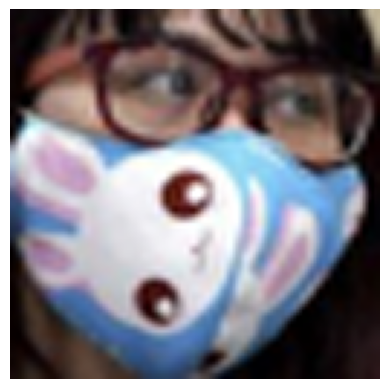

1/1 [==============================] - 0s 48ms/step
[[1.3357032e-10 1.0000000e+00 3.5249288e-09]]
1
La persona en la imagen está usando una mascara


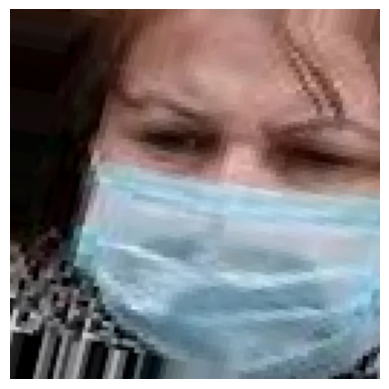

1/1 [==============================] - 0s 46ms/step
[[2.2943992e-15 1.0000000e+00 8.2050605e-16]]
1
La persona en la imagen está usando una mascara


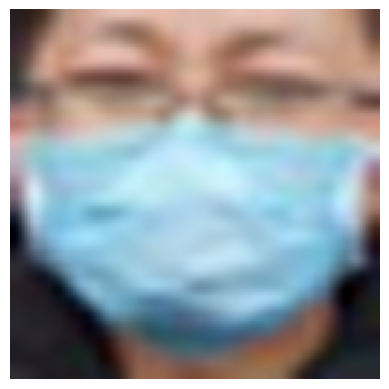

In [ ]:
Image_Test("/content/mi_modelo_final/correct (1).png")
Image_Test("/content/mi_modelo_final/correct (2).png")
Image_Test("/content/mi_modelo_final/correct (3).png")

1/1 [==============================] - 0s 33ms/step
[[2.9037931e-04 2.1587762e-03 9.9755090e-01]]
2
La persona en la imagen está usando una mascara incorrectamente


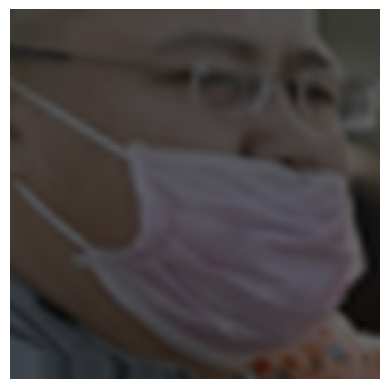

1/1 [==============================] - 0s 31ms/step
[[8.6591982e-08 1.1716845e-05 9.9998820e-01]]
2
La persona en la imagen está usando una mascara incorrectamente


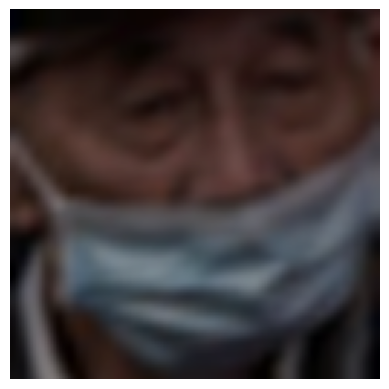

1/1 [==============================] - 0s 32ms/step
[[3.3456264e-09 2.5312008e-07 9.9999976e-01]]
2
La persona en la imagen está usando una mascara incorrectamente


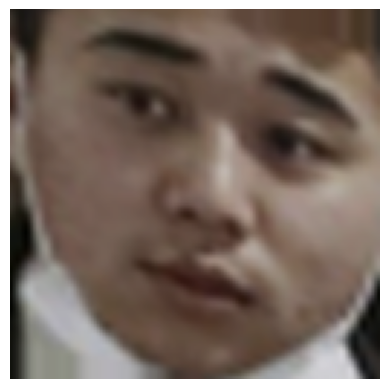

In [25]:
Image_Test("/content/mi_modelo_final/incorrect (1).png")
Image_Test("/content/mi_modelo_final/incorrect (2).png")
Image_Test("/content/mi_modelo_final/incorrect (3).png")

1/1 [==============================] - 0s 29ms/step
[[1.0000000e+00 3.1305724e-12 8.0429127e-26]]
0
La persona en la imagen no está usando una mascara


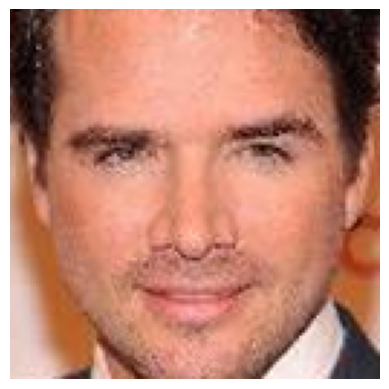

1/1 [==============================] - 0s 30ms/step
[[1.0000000e+00 3.6473236e-10 7.9140076e-22]]
0
La persona en la imagen no está usando una mascara


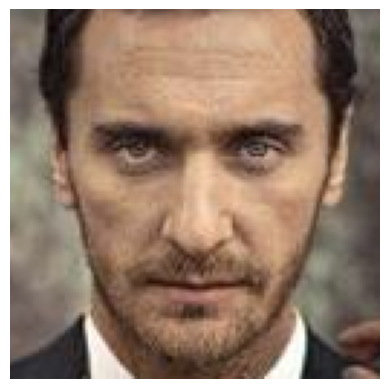

1/1 [==============================] - 0s 30ms/step
[[9.9994802e-01 5.1968316e-05 7.4287959e-17]]
0
La persona en la imagen no está usando una mascara


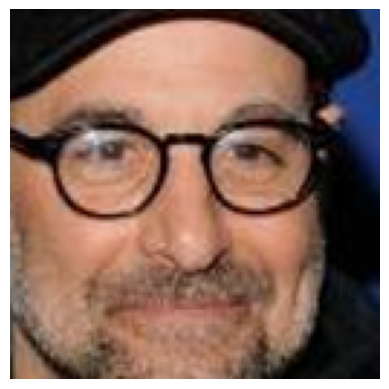

In [26]:
Image_Test("/content/mi_modelo_final/without (1).png")
Image_Test("/content/mi_modelo_final/without (2).png")
Image_Test("/content/mi_modelo_final/without (3).png")



##**Probando el modelo con imagenes fuera del dataset**

En este caso se seleccionaron distintas imagenes por fuera del dataset original, entre ellas se seleccionaron algunos famosos para darle variedad y hasta algunas fotos nuestras como se puede apreciar

1/1 [==============================] - 0s 31ms/step
[[1.0000000e+00 4.3277133e-13 1.9291193e-28]]
0
La persona en la imagen no está usando una mascara


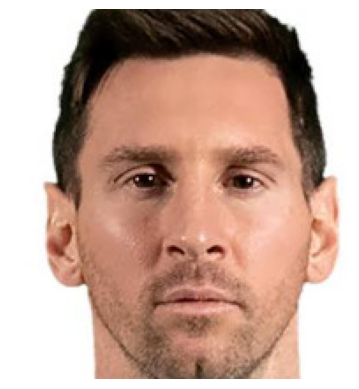

1/1 [==============================] - 0s 30ms/step
[[9.7814912e-01 2.1850916e-02 1.5140245e-12]]
0
La persona en la imagen no está usando una mascara


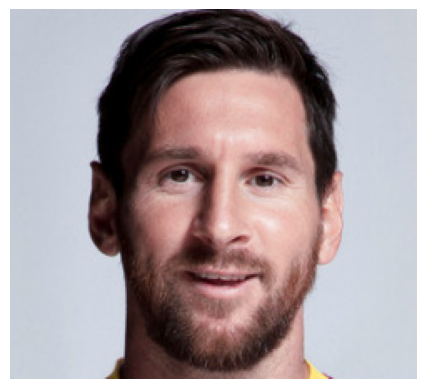

1/1 [==============================] - 0s 29ms/step
[[9.9989653e-01 1.0348261e-04 7.9045326e-10]]
0
La persona en la imagen no está usando una mascara


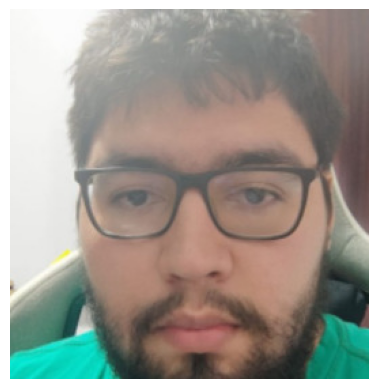

1/1 [==============================] - 0s 32ms/step
[[0.00095476 0.49868244 0.5003628 ]]
2
La persona en la imagen está usando una mascara incorrectamente


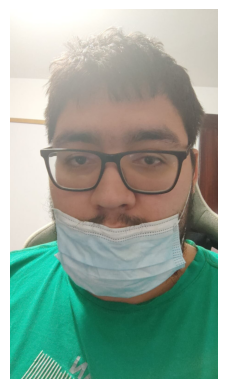

1/1 [==============================] - 0s 59ms/step
[[1.9052911e-06 9.9910945e-01 8.8860426e-04]]
1
La persona en la imagen está usando una mascara


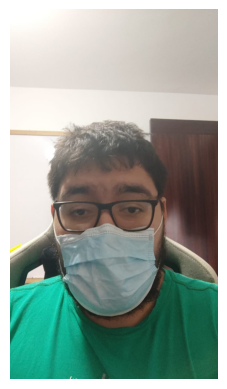

1/1 [==============================] - 0s 41ms/step
[[3.2022990e-13 1.0000000e+00 1.5303962e-13]]
1
La persona en la imagen está usando una mascara


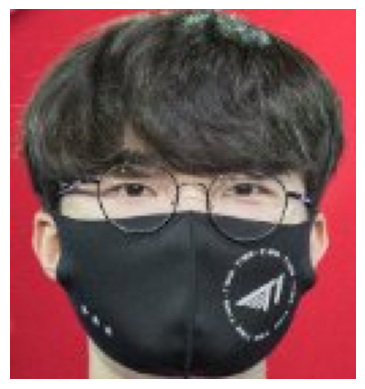

In [ ]:
Image_Test("/content/mi_modelo_final/others (1).jpg")
Image_Test("/content/mi_modelo_final/others (2).jpg")
Image_Test("/content/mi_modelo_final/others (3).jpg")
Image_Test("/content/mi_modelo_final/others (4).jpg")
Image_Test("/content/mi_modelo_final/others (5).jpg")
Image_Test("/content/mi_modelo_final/others (6).jpg")

## Prueba del Modelo con Varias Imágenes y Visualización de Resultados

Por ultimo, se realiza una prueba del modelo preentrenado utilizando varias imágenes de prueba y grafica los resultados junto con las imágenes originales. Este enfoque permite evaluar el rendimiento del modelo en un conjunto más amplio de datos y visualizar las predicciones de manera conjunta.

### Descripción
1. **Preparación del Directorio de Pruebas:**
   - Se crean directorios para almacenar las imágenes de prueba.
   - Se copian imágenes de cada clase (`with_mask`, `without_mask`, `mask_weared_incorrect`) a los directorios correspondientes.

2. **Generación de Datos:**
   - Se utiliza `ImageDataGenerator` para escalar los valores de los píxeles y crear un flujo de datos desde el directorio de pruebas.

3. **Mapeo de Etiquetas:**
   - Se mapean las etiquetas de las clases a números y viceversa para facilitar la interpretación de las predicciones.

4. **Realización de Predicciones:**
   - Se generan predicciones para las imágenes de prueba y se convierten las probabilidades en etiquetas de clase.

5. **Visualización de Resultados:**
   - Se obtienen las rutas y nombres de los archivos para la visualización.
   - Se crea una gráfica con las predicciones y las etiquetas reales, mostrando las imágenes originales y sus predicciones.


In [ ]:
import os
from shutil import copyfile

# Crear directorios para datos de prueba
os.makedirs("./test/with_mask", exist_ok=True)
os.makedirs("./test/mask_weared_incorrect", exist_ok=True)
os.makedirs("./test/without_mask", exist_ok=True)

# Copiar archivos a los directorios de prueba
def copy_files(src_path, dst_path, num_files):
    files_copied = 0
    for img_file in os.listdir(src_path):
        if files_copied >= num_files:
            break
        copyfile(os.path.join(src_path, img_file), os.path.join(dst_path, img_file))
        files_copied += 1

# Copiar 8 imágenes de cada clase
copy_files('/content/dataset/mask_weared_incorrect', './test/mask_weared_incorrect', 8)
copy_files('/content/dataset/with_mask', './test/with_mask', 8)
copy_files('/content/dataset/without_mask', './test/without_mask', 9)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear generador de datos
test_data_generator = ImageDataGenerator(rescale=1.0/255.0)

# Crear flujo de datos desde el directorio
test_data_2 = test_data_generator.flow_from_directory(
    "./test",
    target_size=(128, 128),
    batch_size=1,
    shuffle=False
)

# Mapear etiquetas
labels = {'without_mask': 0, 'with_mask': 1, 'mask_weared_incorrect': 2}
labels_2 = {v: k for k, v in labels.items()}

# Realizar predicciones
predictions = model.predict(test_data_2).argmax(axis=1)
pred_label = [labels_2[i] for i in predictions]


Found 25 images belonging to 3 classes.
25/25 [==============================] - 1s 15ms/step


In [ ]:
import matplotlib.pyplot as plt

predictions = model.predict(test_data_2).argmax(axis=1)
pred_label = [labels_2[i] for i in predictions]


# Obtener las rutas y nombres de los archivos para la visualización
paths = []
names = []
for label in ['mask_weared_incorrect', 'with_mask', 'without_mask']:
    path = f"./test/{label}"
    for img_file in os.listdir(path):
        paths.append(os.path.join(path, img_file))
        names.append(label)

# Crear una gráfica con las predicciones y las etiquetas reales
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(paths[i]))
    ax.set_title(f"PREDICCION: {pred_label[i]}")
    ax.set_xlabel(f"DATA: {names[i]}")

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.